Polinomio de interpolación de Newton:
3.99999999999999e-8*x**3 + 2.00000000000005e-6*x**2 + 0.00359999999999999*x - 0.0699999999999998

Deformación estimada para una carga de 125 N: 0.0000 mm


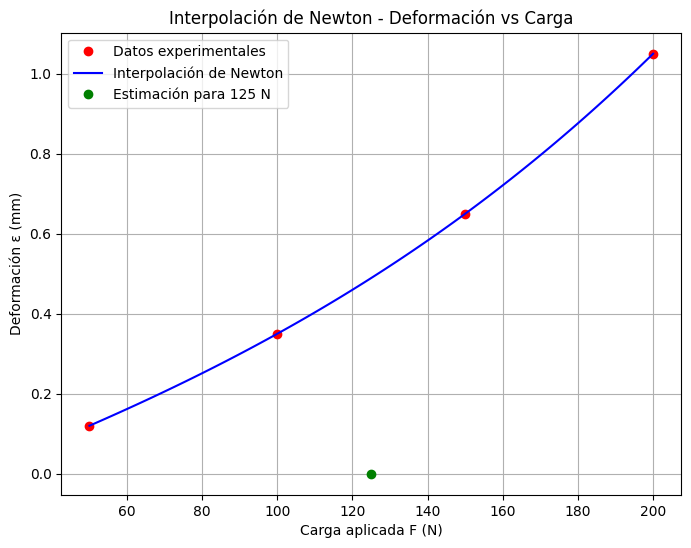

In [2]:
#   Codigo que implementa la interpolacion de Newton
#   para ajustar un conjunto de datos
#
#   EJERCICIO 1
#           Autor:
#   kimberly milagros miranda rosel
#   kimberlymiranda080805@gmail.com
#   Version 2.0 : 08/05/2025
#


import numpy as np
import matplotlib.pyplot as plt

def newton_divided_diff(x, y):
    """ Calcula la tabla de diferencias divididas de Newton """
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # Primera columna es y

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_polynomial_expr(coef, x_data):
    """ Devuelve la expresión simbólica del polinomio de Newton """
    from sympy import symbols, simplify
    x = symbols('x')
    n = len(coef)
    expr = coef[0]
    term = 1
    for i in range(1, n):
        term *= (x - x_data[i-1])
        expr += coef[i] * term
    return simplify(expr)

def newton_interpolation(x_data, y_data, x_vals):
    """ Evalúa el polinomio de Newton en los puntos x """
    coef = newton_divided_diff(x_data, y_data)
    n = len(x_data)
    y_interp = np.zeros_like(x_vals)

    for i in range(len(x_vals)):
        term = coef[0]
        product = 1
        for j in range(1, n):
            product *= (x_vals[i] - x_data[j-1])
            term += coef[j] * product
        y_interp[i] = term

    return y_interp, coef

# Datos del experimento
x_data = np.array([50, 100, 150, 200])  # Carga aplicada (N)
y_data = np.array([0.12, 0.35, 0.65, 1.05])  # Deformación (mm)

# Estimar la deformación para 125 N
x_estimado = 125
x_vals = np.linspace(min(x_data), max(x_data), 100)
y_interp, coef = newton_interpolation(x_data, y_data, x_vals)

# Calcular la deformación estimada en 125 N
y_est_125, _ = newton_interpolation(x_data, y_data, [x_estimado])

# Mostrar polinomio simbólico
from sympy import symbols, pprint
x = symbols('x')
polinomio_expr = newton_polynomial_expr(coef, x_data)

print("Polinomio de interpolación de Newton:")
print(polinomio_expr)
print(f"\nDeformación estimada para una carga de {x_estimado} N: {y_est_125[0]:.4f} mm")

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Datos experimentales')
plt.plot(x_vals, y_interp, 'b-', label='Interpolación de Newton')
plt.plot(x_estimado, y_est_125, 'go', label=f'Estimación para {x_estimado} N')
plt.xlabel('Carga aplicada F (N)')
plt.ylabel('Deformación ε (mm)')
plt.title('Interpolación de Newton - Deformación vs Carga')
plt.legend()
plt.grid(True)
plt.savefig("newton_interpolacion_experimento.png")
plt.show()


Polinomio de interpolación de Newton:
-6.66666666666665e-9*x**4 + 8.66666666666665e-6*x**3 - 0.00398333333333333*x**2 + 0.878333333333332*x - 44.9999999999999

Deformación estimada para una carga de 275 c: 37.0000 %


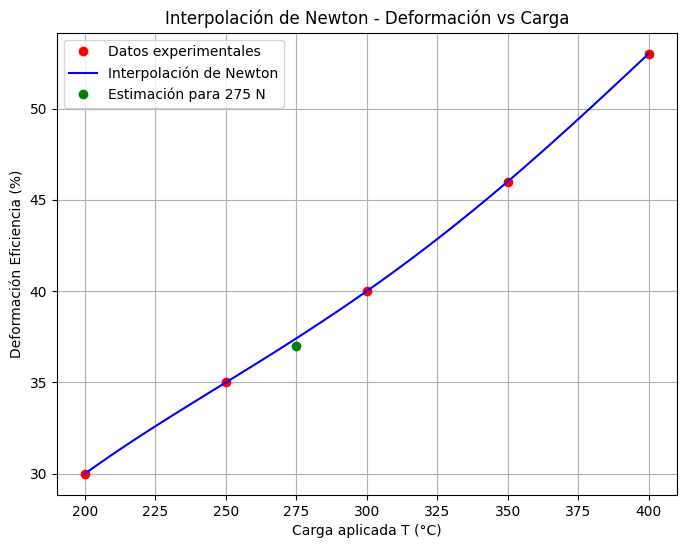

In [9]:
#   Codigo que implementa la interpolacion de Newton
#   para ajustar un conjunto de datos
#
#   EJERCICIO 2
#           Autor:
#   kimberly milagros miranda rosel
#   kimberlymiranda080805@gmail.com
#   Version 2.0 : 08/05/2025
#


import numpy as np
import matplotlib.pyplot as plt

def newton_divided_diff(x, y):
    """ Calcula la tabla de diferencias divididas de Newton """
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # Primera columna es y

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_polynomial_expr(coef, x_data):
    """ Devuelve la expresión simbólica del polinomio de Newton """
    from sympy import symbols, simplify
    x = symbols('x')
    n = len(coef)
    expr = coef[0]
    term = 1
    for i in range(1, n):
        term *= (x - x_data[i-1])
        expr += coef[i] * term
    return simplify(expr)

def newton_interpolation(x_data, y_data, x_vals):
    """ Evalúa el polinomio de Newton en los puntos x """
    coef = newton_divided_diff(x_data, y_data)
    n = len(x_data)
    y_interp = np.zeros_like(x_vals)

    for i in range(len(x_vals)):
        term = coef[0]
        product = 1
        for j in range(1, n):
            product *= (x_vals[i] - x_data[j-1])
            term += coef[j] * product
        y_interp[i] = term

    return y_interp, coef

# Datos del experimento
x_data = np.array([200, 250, 300, 350, 400])  # Carga aplicada (°c)
y_data = np.array([30, 35, 40, 46, 53])  # Deformación (%)

# Estimar la deformación para 275 N
x_estimado = 275
x_vals = np.linspace(min(x_data), max(x_data), 100)
y_interp, coef = newton_interpolation(x_data, y_data, x_vals)

# Calcular la deformación estimada en 125 N
y_est_275, _ = newton_interpolation(x_data, y_data, [x_estimado])

# Mostrar polinomio simbólico
from sympy import symbols, pprint
x = symbols('x')
polinomio_expr = newton_polynomial_expr(coef, x_data)

print("Polinomio de interpolación de Newton:")
print(polinomio_expr)
print(f"\nDeformación estimada para una carga de {x_estimado} c: {y_est_275[0]:.4f} %")

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Datos experimentales')
plt.plot(x_vals, y_interp, 'b-', label='Interpolación de Newton')
plt.plot(x_estimado, y_est_275, 'go', label=f'Estimación para {x_estimado} N')
plt.xlabel('Carga aplicada T (°C)')
plt.ylabel('Deformación Eficiencia (%)')
plt.title('Interpolación de Newton - Deformación vs Carga')
plt.legend()
plt.grid(True)
plt.savefig("newton_interpolacion_experimento.png")
plt.show()

Polinomio de interpolación de Newton (Cd en función de V):
2.49999999999998e-9*x**5 - 4.5833333333333e-7*x**4 + 3.12499999999998e-5*x**3 - 0.000954166666666659*x**2 + 0.0108499999999999*x + 0.280000000000001

Coeficiente de arrastre estimado para una velocidad de 35 m/s: 0.0000

Polinomio desarrollado con coeficientes decimales:
Cd(V) = 2.49999999999998e-9*x**5 - 4.5833333333333e-7*x**4 + 3.12499999999998e-5*x**3 - 0.000954166666666659*x**2 + 0.0108499999999999*x + 0.280000000000001


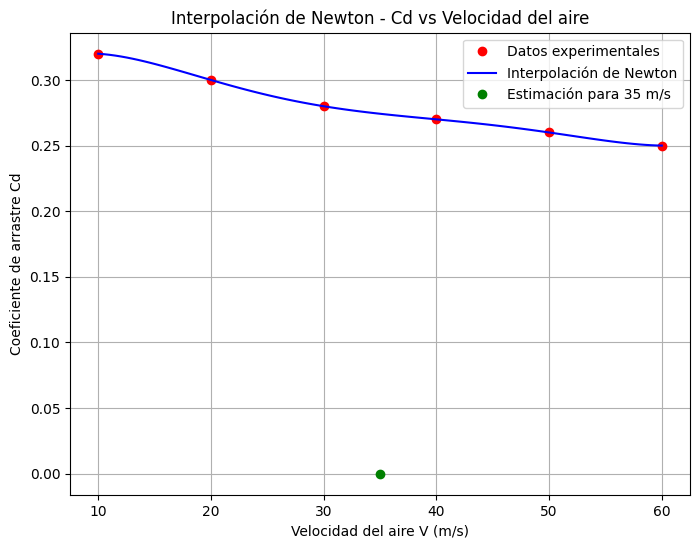

In [10]:
#   Codigo que implementa la interpolacion de Newton
#   para ajustar un conjunto de datos
#
#   EJERCICIO 3
#           Autor:
#   kimberly milagros miranda rosel
#   kimberlymiranda080805@gmail.com
#   Version 2.0 : 08/05/2025
#

import numpy as np
import matplotlib.pyplot as plt

def newton_divided_diff(x, y):
    """ Calcula la tabla de diferencias divididas de Newton """
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # Primera columna es y

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_polynomial_expr(coef, x_data):
    """ Devuelve la expresión simbólica del polinomio de Newton """
    from sympy import symbols, simplify
    x = symbols('x')
    n = len(coef)
    expr = coef[0]
    term = 1
    for i in range(1, n):
        term *= (x - x_data[i-1])
        expr += coef[i] * term
    return simplify(expr)

def newton_interpolation(x_data, y_data, x_vals):
    """ Evalúa el polinomio de Newton en los puntos x """
    coef = newton_divided_diff(x_data, y_data)
    n = len(x_data)
    y_interp = np.zeros_like(x_vals)

    for i in range(len(x_vals)):
        term = coef[0]
        product = 1
        for j in range(1, n):
            product *= (x_vals[i] - x_data[j-1])
            term += coef[j] * product
        y_interp[i] = term

    return y_interp, coef

# Datos del experimento en el túnel de viento
velocidades = np.array([10, 20, 30, 40, 50, 60])  # Velocidad del aire (m/s)
coef_arrastre = np.array([0.32, 0.30, 0.28, 0.27, 0.26, 0.25])  # Coeficiente de arrastre Cd

# Estimar Cd para una velocidad de 35 m/s
velocidad_estimado = 35
x_vals = np.linspace(min(velocidades), max(velocidades), 100)
y_interp, coef = newton_interpolation(velocidades, coef_arrastre, x_vals)

# Calcular Cd estimado en 35 m/s
cd_est_35, _ = newton_interpolation(velocidades, coef_arrastre, [velocidad_estimado])

# Mostrar polinomio simbólico
from sympy import symbols
x = symbols('x')
polinomio_expr = newton_polynomial_expr(coef, velocidades)

print("Polinomio de interpolación de Newton (Cd en función de V):")
print(polinomio_expr)
print(f"\nCoeficiente de arrastre estimado para una velocidad de {velocidad_estimado} m/s: {cd_est_35[0]:.4f}")

# Polinomio como texto plano con coeficientes decimales
print("\nPolinomio desarrollado con coeficientes decimales:")
print(f"Cd(V) = {polinomio_expr.evalf()}")

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(velocidades, coef_arrastre, 'ro', label='Datos experimentales')
plt.plot(x_vals, y_interp, 'b-', label='Interpolación de Newton')
plt.plot(velocidad_estimado, cd_est_35, 'go', label=f'Estimación para {velocidad_estimado} m/s')
plt.xlabel('Velocidad del aire V (m/s)')
plt.ylabel('Coeficiente de arrastre Cd')
plt.title('Interpolación de Newton - Cd vs Velocidad del aire')
plt.legend()
plt.grid(True)
plt.savefig("newton_interpolacion_cd.png")
plt.show()
